IMPORTING REQUIRED LIBRARIES

In [1]:
import warnings 
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

IMPORTING MACHINE LEARNING MODELS

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

DATA COLLECTION AND PREPROCESSING

In [8]:
df =  pd.read_csv(r"C:\Users\KALYAN\Desktop\Machine Learning\SPAM.csv")
df

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
data = df.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

CHECKING NULL VALUES

In [10]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

LABEL ENCODING

HAM IS REPRESENTED BY 1  &  SPAM IS REPRESENTED BY 0 

In [11]:
data.dtypes

Category    object
Message     object
dtype: object

In [16]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

In [17]:
data['Category'].value_counts()

1    4825
0     747
Name: Category, dtype: int64

SEPARATING THE DATA AS TEXT AND LABEL

In [19]:
X = data['Message']

Y = data['Category']

In [20]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [21]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [23]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


FEATURE EXTRACTION

TRANSFORMING THE TEXT DATA INTO NUMERICAL VALUES

In [24]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase = 'True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# CONVERTING Y_train and Y_test VALUES AS INTEGERS
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [25]:
X_train_features

<4457x7511 sparse matrix of type '<class 'numpy.float64'>'
	with 34759 stored elements in Compressed Sparse Row format>

In [26]:
print(Y_train)

3075    1
1787    1
1614    1
4304    1
3266    1
       ..
789     1
968     1
1667    1
3321    1
1688    1
Name: Category, Length: 4457, dtype: int32


# TRAINING THE MODEL

# LOGISTIC REGRESSION

In [29]:
lregression = LogisticRegression(max_iter=1000)

lregression.fit(X_train_features, Y_train)

testdata1 = lregression.predict(X_test_features)
        
accuracy1 = accuracy_score(Y_test, testdata1)
                
print("Testing Data Accuracy of Logistic Regression:", round(accuracy1*100, 2), "%")


traindata1 = lregression.predict(X_train_features)
        
acc1 = accuracy_score(Y_train, traindata1)
                
print("\nTraining Data Accuracy of Logistic Regression:", round(acc1*100, 2), "%")


precision_test_lr = precision_score(Y_test, testdata1)

print("\nPrecision:", precision_test_lr)


recall_test_lr = recall_score(Y_test, testdata1)

print("\nRecall:", recall_test_lr)


f1_test_lr = f1_score(Y_test, testdata1)

print("\nF1 Score:", f1_test_lr)

Testing Data Accuracy of Logistic Regression: 96.23 %

Training Data Accuracy of Logistic Regression: 96.61 %

Precision: 0.959

Recall: 0.9989583333333333

F1 Score: 0.9785714285714285


# DECISION TREES

In [30]:
dtrees = DecisionTreeClassifier()

dtrees.fit(X_train_features, Y_train)

testdata2 = dtrees.predict(X_test_features)

accuracy2 = accuracy_score(Y_test, testdata2)

print("Testing Data Accuracy of Decision Trees:", round(accuracy2*100, 2), "%")


traindata2 = dtrees.predict(X_train_features)
        
acc2 = accuracy_score(Y_train, traindata2)
                
print("\nTraining Data Accuracy of Decision Trees:", round(acc2*100, 2), "%")


precision_test_dt = precision_score(Y_test, testdata2)

print("\nPrecision:", precision_test_dt)


recall_test_dt = recall_score(Y_test, testdata2)

print("\nRecall:", recall_test_dt)


f1_test_dt = f1_score(Y_test, testdata2)

print("\nF1 Score:", f1_test_dt)

Testing Data Accuracy of Decision Trees: 97.13 %

Training Data Accuracy of Decision Trees: 100.0 %

Precision: 0.9783505154639175

Recall: 0.9885416666666667

F1 Score: 0.9834196891191711


# SUPPORT VECTOR MACHINE

In [31]:
svm = SVC(kernel='linear')

svm.fit(X_train_features, Y_train)

testdata3 = svm.predict(X_test_features)

accuracy3 = accuracy_score(Y_test, testdata3)

print("Testing Data Accuracy of Support Vector Machine:", round(accuracy3*100, 2), "%")


traindata3 = svm.predict(X_train_features)
        
acc3 = accuracy_score(Y_train, traindata3)
                
print("\nTraining Data Accuracy of Support Vector Machine:", round(acc3*100, 2), "%")


precision_test_svm = precision_score(Y_test, testdata3)

print("\nPrecision:", precision_test_svm)



recall_test_svm = recall_score(Y_test, testdata3)

print("\nRecall:", recall_test_svm)


f1_test_svm = f1_score(Y_test, testdata3)

print("\nF1 Score:", f1_test_svm)

Testing Data Accuracy of Support Vector Machine: 98.39 %

Training Data Accuracy of Support Vector Machine: 99.62 %

Precision: 0.9825819672131147

Recall: 0.9989583333333333

F1 Score: 0.9907024793388429


# K NEAREST NEIGHBORS

In [32]:
knn = KNeighborsClassifier()

knn.fit(X_train_features, Y_train)

testdata4 = knn.predict(X_test_features)

accuracy4 = accuracy_score(Y_test, testdata4)

print("Testing Data Accuracy of K Nearest Neighbors:", round(accuracy4*100, 2), "%")


traindata4 = knn.predict(X_train_features)
        
acc4 = accuracy_score(Y_train, traindata4)
                
print("\nTraining Data Accuracy of K Nearest Neighbors:", round(acc4*100, 2), "%")


precision_test_knn = precision_score(Y_test, testdata4)

print("\nPrecision:", precision_test_knn)


recall_test_knn = recall_score(Y_test, testdata4)

print("\nRecall:", recall_test_knn)


f1_test_knn = f1_score(Y_test, testdata4)

print("\nF1 Score:", f1_test_knn)

Testing Data Accuracy of K Nearest Neighbors: 90.58 %

Training Data Accuracy of K Nearest Neighbors: 91.99 %

Precision: 0.9014084507042254

Recall: 1.0

F1 Score: 0.9481481481481481


# RANDOM FOREST

In [33]:
rf = RandomForestClassifier()

rf.fit(X_train_features, Y_train)

testdata5 = rf.predict(X_test_features)

accuracy5 = accuracy_score(Y_test, testdata5)

print("Testing Data Accuracy of Random Forest:", round(accuracy5*100, 2), "%")


traindata5 = rf.predict(X_train_features)
        
acc5 = accuracy_score(Y_train, traindata5)
                
print("\nTraining Data Accuracy of Random Forest:", round(acc5*100, 2), "%")


precision_test_rf = precision_score(Y_test, testdata5)

print("\nPrecision:", precision_test_rf)


recall_test_rf = recall_score(Y_test, testdata5)

print("\nRecall:", recall_test_rf)


f1_test_rf = f1_score(Y_test, testdata5)

print("\nF1 Score:", f1_test_rf)

Testing Data Accuracy of Random Forest: 97.85 %

Training Data Accuracy of Random Forest: 100.0 %

Precision: 0.9765784114052953

Recall: 0.9989583333333333

F1 Score: 0.9876416065911432


# NAIVE BAYES

In [34]:
nb = GaussianNB()

nb.fit(X_train_features.toarray(), Y_train)

testdata6 = nb.predict(X_test_features.toarray())

accuracy6 = accuracy_score(Y_test, testdata6)

print("Testing Data Accuracy of Naive Bayes:", round(accuracy6*100, 2), "%")


traindata6 = nb.predict(X_train_features.toarray())
        
acc6 = accuracy_score(Y_train, traindata6)
                
print("\nTraining Data Accuracy of Naive Bayes:", round(acc6*100, 2), "%")


precision_test_nb = precision_score(Y_test, testdata6)

print("\nPrecision:", precision_test_nb)


recall_test_nb = recall_score(Y_test, testdata6)

print("\nRecall:", recall_test_nb)


f1_test_nb = f1_score(Y_test, testdata6)

print("\nF1 Score:", f1_test_nb)

Testing Data Accuracy of Naive Bayes: 90.31 %

Training Data Accuracy of Naive Bayes: 93.7 %

Precision: 0.9829931972789115

Recall: 0.903125

F1 Score: 0.9413680781758956


#   Plotting Accuracy Graph

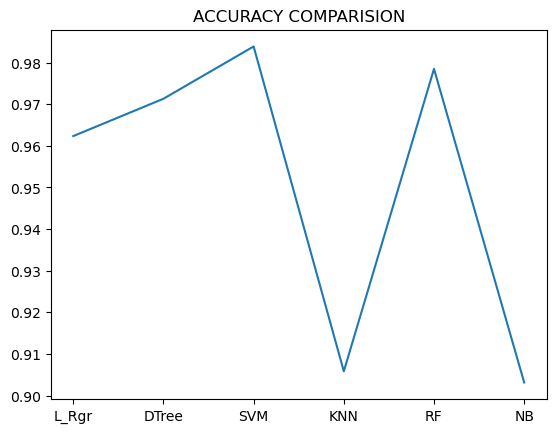

In [35]:
alg = ['L_Rgr','DTree','SVM','KNN','RF','NB']
acc = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6]
plt.plot(alg,acc)
plt.title("ACCURACY COMPARISION")
plt.show()

# BUILDING A PREDICTIVE SYSTEM

In [24]:
input_mail = ["Hi this is  kalyan"]

input_mail_features = feature_extraction.transform(input_mail)

prediction = svm.predict(input_mail_features)

if(prediction == 0):
    print("SPAM MAIL")
else:
    print("HAM MAIL")

HAM MAIL
